In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
l = 2*np.random.randn(100000)+15
m = 2*np.random.randn(100000)+5
r = 2*np.random.randn(100000)+8

In [36]:
np.var(l)

3.970265303340616

In [37]:
Dlm = l-m
Drm = r-m

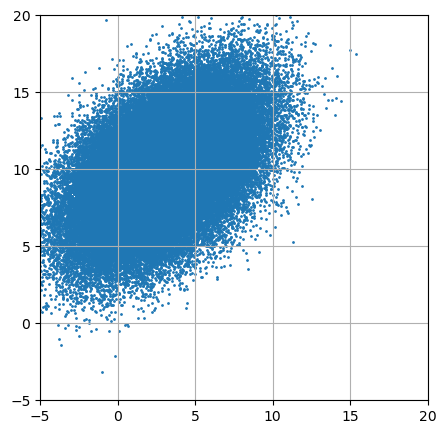

In [38]:
plt.figure(figsize=[5,5])
plt.scatter(Drm,Dlm,1)
plt.xlim([-5,20])
plt.ylim([-5,20])
plt.grid()

In [33]:
np.cov(Dlm,Drm)

array([[8.04340997, 4.02391478],
       [4.02391478, 8.0172022 ]])

In [95]:
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm as norm

ses = np.random.randn(10,3)

In [125]:
totals = np.zeros(10)
t = np.array([0,2,3])
for p in np.linspace(-20,30,50000):
    totals+=mvn.pdf(ses,p+t,np.eye(3))
totals/=np.sum(totals)

In [126]:
totals

array([0.12649947, 0.09000124, 0.04432761, 0.20890915, 0.01385609,
       0.01256658, 0.12142197, 0.2847485 , 0.07421713, 0.02345226])

In [141]:
v = np.ones(3)/np.sqrt(3)
dist = np.linalg.norm((v*((ses-t)@v)[:,None]+t)-ses,axis=1)
ps = norm(0,1).pdf(dist)
ps/=np.sum(ps)
ps

array([0.12649947, 0.09000124, 0.04432761, 0.20890915, 0.01385609,
       0.01256658, 0.12142197, 0.2847485 , 0.07421713, 0.02345226])

# Demo

In [205]:
def getsignalstrength(transmitter_angle, antenna_offset, attenuation):
    if not isinstance(transmitter_angle, np.ndarray): transmitter_angle = np.array([transmitter_angle])
    if not isinstance(antenna_offset, np.ndarray): antenna_offset = np.array([antenna_offset])

    ang = (transmitter_angle[:,None]-antenna_offset[None,:]+np.pi)%(np.pi*2)-np.pi
    s = 20*np.abs(np.cos(3*ang)**2*np.exp(-ang**2))-attenuation
    return s

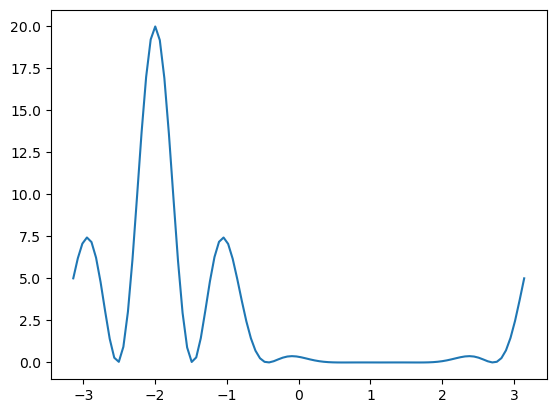

In [206]:
ang = np.linspace(-np.pi,np.pi,100)
plt.plot(ang,getsignalstrength(ang,-2,0))

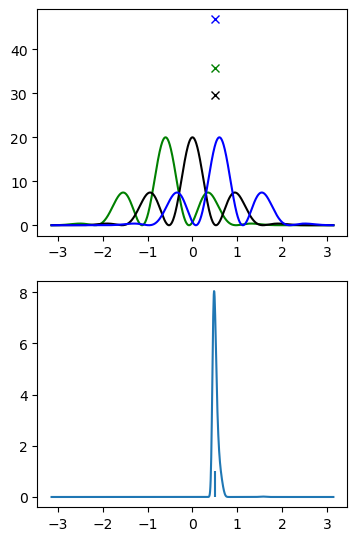

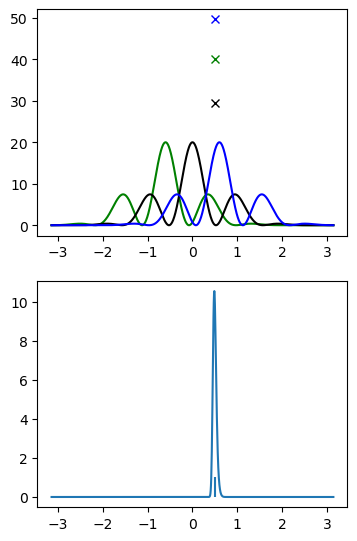

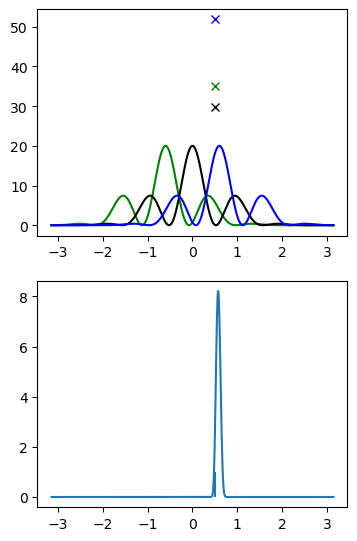

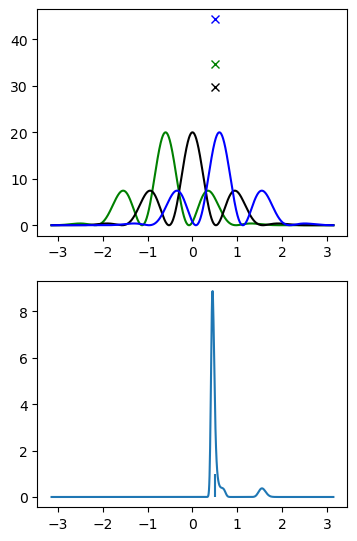

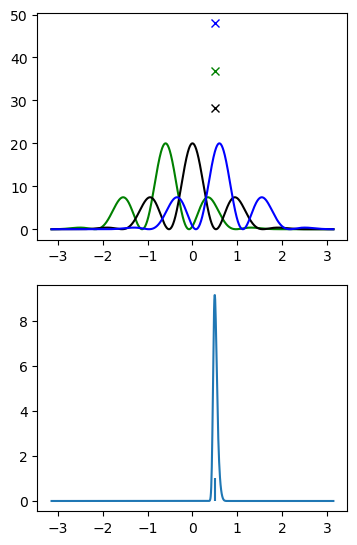

In [303]:
for it in range(5):
    plt.figure(figsize=[4,10])
    true_ang = 0.5
    signals = getsignalstrength(true_ang, np.array([-0.6,0,0.6]), -30)
    signals+= 2*np.random.randn(3)
    
    v = np.ones(3)/np.sqrt(3)

    ang = np.linspace(-np.pi,np.pi,1000)
    signal_mean_for_angle = getsignalstrength(ang, np.array([-0.6,0,0.6]), 0)
    dist = np.linalg.norm((v*((signals-signal_mean_for_angle)@v)[:,None]+signal_mean_for_angle)-signals,axis=1)
    ps = norm(0,2).pdf(dist)
    ps/=np.sum(ps)*(ang[1]-ang[0])
    plt.subplot(3,1,1)
    plt.plot(ang,signal_mean_for_angle[:,0],'g-')
    plt.plot(ang,signal_mean_for_angle[:,1],'k-')
    plt.plot(ang,signal_mean_for_angle[:,2],'b-')
    plt.plot(true_ang,signals[0,0],'xg')
    plt.plot(true_ang,signals[0,1],'xk')
    plt.plot(true_ang,signals[0,2],'xb')
    plt.subplot(3,1,2)
    plt.plot(ang,ps)
    plt.vlines(true_ang,0,1)